In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
import matplotlib

In [2]:
X, y = datasets.load_iris(return_X_y=True, as_frame=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
X.iloc[:, 1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

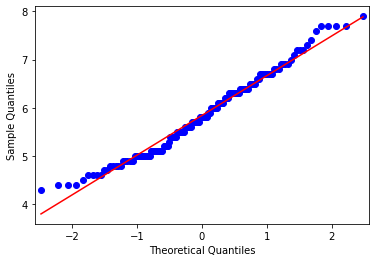

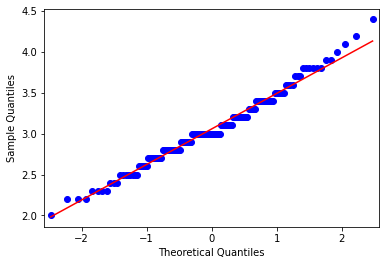

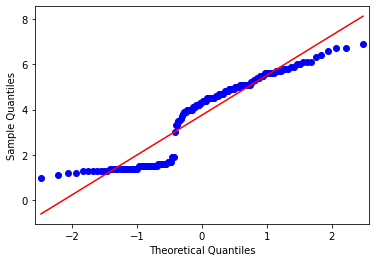

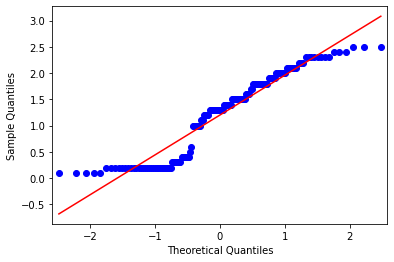

In [4]:
for i in range(4):
    sm.qqplot(X.iloc[:, i], line='s')
    
plt.show()

### We can see sepal length (cm) and sepal width (cm) have normal distribution by qqplot, but petal length (cm) and petal width (cm) didn't normal distributed, then we will use MinMaxScaler instead of StandartScaler

### Now we need to check classes are balanced or not

In [5]:
np.unique(y, return_counts=True) #classes balanced

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

### Now we create KNNClassifier for 3 classes, I will use GridSearchCV to find best estimator

In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [15]:
params_dict = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'chebyshev']}
gcv = GridSearchCV(KNeighborsClassifier(), params_dict, n_jobs=-1, cv=3, verbose=1)
gcv.fit(X, y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [16]:
gcv.best_params_, gcv.best_score_

({'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'},
 0.9666666666666667)

### GreedSearchCV get best estimator with parameters distance metric euclidean $\sqrt{\sum{(x_{1} - x_{2})^2)}}$ n_neighbors = 5, weights = uniform and best_score = 0.966

In [17]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.84136038 0.11751808]


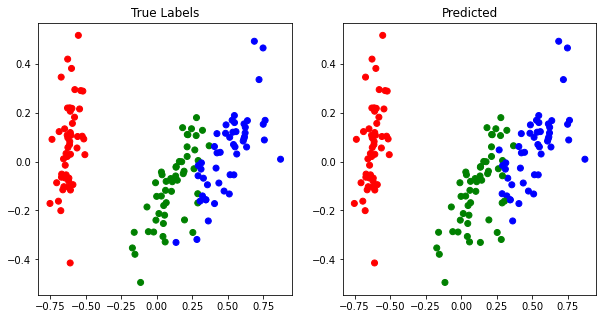

In [19]:
plt.figure(figsize=(10, 5))

y_predicted = gcv.best_estimator_.predict(X)
colors = ['red', 'green', 'blue']

plt.subplot(1, 2, 1)
plt.title('True Labels')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(colors))

plt.subplot(1, 2, 2)
plt.title('Predicted')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_predicted, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()